# Python Lecture Module: Basic Statistics for Data Cleaning and Preprocessing

## 1. Introduction to Statistics in Python
Statistics is a vital step in data analysis, especially for data cleaning and preprocessing. Python provides several libraries like `numpy`, `pandas`, `scipy`, and `statistics` to perform statistical operations. In this module, we will focus on key aspects of statistics for preparing data for machine learning and analysis. These include descriptive statistics, handling missing data, and techniques for data normalization and scaling.


## 2. Descriptive Statistics
Descriptive statistics summarize and describe the main features of a dataset. Common metrics include mean, median, mode, variance, and standard deviation. Understanding these metrics helps identify trends, outliers, and the overall data distribution.

### 2.1 Key Descriptive Statistics
1. **Mean:** The average of all data values.
   \[ \text{Mean} = \frac{\sum_{i=1}^n x_i}{n} \]

2. **Median:** The middle value when the data is sorted.
   - If \(n\) is odd, the median is the middle value.
   - If \(n\) is even, the median is the average of the two middle values.

3. **Mode:** The most frequently occurring value in the dataset.

4. **Variance:** Measures how much the data varies from the mean.
   \[ \text{Variance} = \frac{\sum_{i=1}^n (x_i - \text{Mean})^2}{n} \]

5. **Standard Deviation:** The square root of the variance.
   \[ \text{Standard Deviation} = \sqrt{\text{Variance}} \]


In [1]:
import numpy as np
import pandas as pd

# Sample Data
data = [10, 20, 20, 40, 50, 60, 70, 100, 120, 150]

# Descriptive Statistics
mean = np.mean(data)
median = np.median(data)
mode = pd.Series(data).mode()[0]
variance = np.var(data)
std_dev = np.std(data)
percentiles = np.percentile(data, [25, 50, 75])

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Variance:", variance)
print("Standard Deviation:", std_dev)
print("Percentiles (25th, 50th, 75th):", percentiles)


Mean: 64.0
Median: 55.0
Mode: 20
Variance: 1944.0
Standard Deviation: 44.090815370097204
Percentiles (25th, 50th, 75th): [25.  55.  92.5]


## 3. Handling Missing Data
Missing data is common and can significantly affect results if not handled properly. Strategies for managing missing data include:

1. **Removal:** Dropping rows or columns with missing values.
2. **Imputation:** Replacing missing values with estimates like mean, median, mode, or other statistical techniques.
3. **Forward/Backward Fill:** Propagating the nearest non-missing value to fill gaps.
4. **Interpolation:** Estimating missing values based on the data trend.
5. **Regression Methods:** Predicting missing values using regression models trained on the available data.

### 3.1 Mathematical Formulas for Regression Methods
- **Simple Linear Regression Equation:**
  \[ y = \beta_0 + \beta_1 x \]
  where:
  - \(y\): Dependent variable (missing value to predict).
  - \(x\): Independent variable.
  - \(\beta_0\): Intercept.
  - \(\beta_1\): Slope of the regression line, calculated as:
    \[ \beta_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2} \]
  - \(\beta_0\): Intercept, calculated as:
    \[ \beta_0 = \bar{y} - \beta_1 \bar{x} \]


In [2]:
import numpy as np
import pandas as pd
# Sample DataFrame with Missing Values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, np.nan, 30, 22],
    'Score': [85, 90, np.nan, 88]
}
df = pd.DataFrame(data)

print("Original Data:\n", df)

# Handling Missing Data
df_dropped_row = df.dropna() # Drop rows with missing value
df_dropped_column = df.dropna(axis=1, how='all') # Drop columns with missing value

# Impute missing values with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Score'].fillna(df['Score'].mean(), inplace=True)

print("After Dropping Missing Data:\n", df_dropped_row)
print("After Imputation:\n", df)


Original Data:
       Name   Age  Score
0    Alice  25.0   85.0
1      Bob   NaN   90.0
2  Charlie  30.0    NaN
3    David  22.0   88.0
After Dropping Missing Data:
     Name   Age  Score
0  Alice  25.0   85.0
3  David  22.0   88.0
After Imputation:
       Name        Age      Score
0    Alice  25.000000  85.000000
1      Bob  25.666667  90.000000
2  Charlie  30.000000  87.666667
3    David  22.000000  88.000000


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/tmp/ipykernel_35/3031204088.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({c

In [7]:
from sklearn.linear_model import LinearRegression

# Sample DataFrame with Missing Values
data = {
    'Feature1': [1, 2, 3, 4, np.nan],
    'Feature2': [2, 4, 6, 8, 10]
}
df = pd.DataFrame(data)

print("Original Data:\n", df)

# Identify missing indices
missing_index = df[df['Feature1'].isnull()].index

# Prepare data for regression
train_data = df.dropna()
X_train = train_data[['Feature2']]
y_train = train_data['Feature1']

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Model parameters
print("Intercept:", model.intercept_)
print("Slope (Coefficient):", model.coef_)

# Predict missing values
X_missing = df.loc[missing_index, ['Feature2']]
df.loc[missing_index, 'Feature1'] = model.predict(X_missing)

print("After Regression Imputation:\n", df)


Original Data:
    Feature1  Feature2
0       1.0         2
1       2.0         4
2       3.0         6
3       4.0         8
4       NaN        10
Intercept: 0.0
Slope (Coefficient): [0.5]
After Regression Imputation:
    Feature1  Feature2
0       1.0         2
1       2.0         4
2       3.0         6
3       4.0         8
4       5.0        10


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [6]:
print(missing_index)
print(train_data)
print(X_missing)

Index([4], dtype='int64')
   Feature1  Feature2
0       1.0         2
1       2.0         4
2       3.0         6
3       4.0         8
   Feature2
4        10


## 4. Data Normalization and Scaling
Normalization and scaling are crucial for algorithms sensitive to data magnitude or range, such as distance-based models (e.g., k-Nearest Neighbors).

### 4.1 Mathematical Formulas
1. **Min-Max Scaling:**
   \[ x' = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}} \]
   Transforms data to a range \([0, 1]\).

2. **Z-Score Normalization:**
   \[ z = \frac{x - \mu}{\sigma} \]
   Centers data around the mean (\(\mu\)) with a standard deviation of 1 (\(\sigma\)).

3. **Log Transformation:**
   \[ x' = \log(x + 1) \]
   Reduces the impact of large values.

4. **Robust Scaling:**
   \[ x' = \frac{x - \text{median}(x)}{\text{IQR}} \]
   Uses the interquartile range (IQR) to reduce the effect of outliers.


In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Sample Data
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=float)

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(data)
print("Min-Max Scaled Data:\n", scaled_data)

# Z-Score Normalization
standard_scaler = StandardScaler()
normalized_data = standard_scaler.fit_transform(data)
print("Z-Score Normalized Data:\n", normalized_data)

# Robust Scaling
robust_scaler = RobustScaler()
robust_scaled_data = robust_scaler.fit_transform(data)
print("Robust Scaled Data:\n", robust_scaled_data)


Min-Max Scaled Data:
 [[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]
Z-Score Normalized Data:
 [[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]
Robust Scaled Data:
 [[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]


### 3.4 Forward/Backward Fill and Interpolation
Forward and backward fill propagate the nearest non-missing value to fill gaps, while interpolation estimates missing values based on the data trend.


In [6]:
# Sample DataFrame with Missing Values
data = {
    'Time': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05'],
    'Temperature': [30, np.nan, 28, np.nan, 27]
}
df = pd.DataFrame(data)

print("Original Data:\n", df)

# Forward Fill
df_ffill = df.fillna(method='ffill')
print("After Forward Fill:\n", df_ffill)

# Backward Fill
df_bfill = df.fillna(method='bfill')
print("After Backward Fill:\n", df_bfill)


Original Data:
          Time  Temperature
0  2024-01-01         30.0
1  2024-01-02          NaN
2  2024-01-03         28.0
3  2024-01-04          NaN
4  2024-01-05         27.0
After Forward Fill:
          Time  Temperature
0  2024-01-01         30.0
1  2024-01-02         30.0
2  2024-01-03         28.0
3  2024-01-04         28.0
4  2024-01-05         27.0
After Backward Fill:
          Time  Temperature
0  2024-01-01         30.0
1  2024-01-02         28.0
2  2024-01-03         28.0
3  2024-01-04         27.0
4  2024-01-05         27.0


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/tmp/ipykernel_35/2077462946.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
/tmp/ipykernel_35/2077462946.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfil

### 3.5 Interpolation
Interpolation uses linear or other methods to estimate missing values based on trends in the data.


In [8]:
# Sample DataFrame with Missing Values
data = {
    'Time': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05'],
    'Temperature': [30, np.nan, 28, np.nan, 27]
}
df = pd.DataFrame(data)

# Interpolation
df_interpolated = df.interpolate(method='linear')
print("After Interpolation:\n", df_interpolated)


After Interpolation:
          Time  Temperature
0  2024-01-01         30.0
1  2024-01-02         29.0
2  2024-01-03         28.0
3  2024-01-04         27.5
4  2024-01-05         27.0


/tmp/ipykernel_35/775528189.py:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate(method='linear')


Intercept: 2.2
Slope (Coefficient): [0.6]


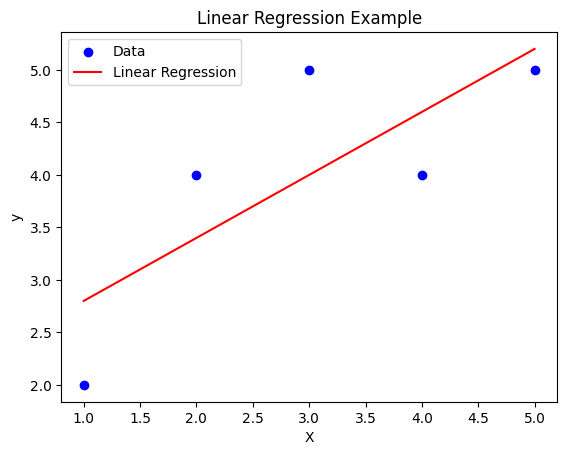

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sample data
X = np.array([[1], [2], [3], [4], [5]])  # independent variable (features)
y = np.array([2, 4, 5, 4, 5])           # dependent variable (target)

# Create model and fit
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Model parameters
print("Intercept:", model.intercept_)
print("Slope (Coefficient):", model.coef_)

# Plot
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Example')
plt.show()


In [1]:
import pandas as pd
import seaborn as sns

# Load sample dataset
df = sns.load_dataset('titanic')

# Display basic info
print("Initial Data Info:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())

# Drop columns with more than 30% missing data
threshold = 0.3 * len(df)
df = df.dropna(thresh=threshold, axis=1)

# Fill missing values
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop duplicates
df = df.drop_duplicates()

# Fix data types
df['survived'] = df['survived'].astype('category')

# Rename columns: lowercase & replace spaces
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Final cleaned data
print("\nCleaned Data Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())


Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Missing values per column:
survived         0
pclass  